In [8]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/"
fname = "CentralDifferenceLocal_Crankshaft-73800Hexa"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = False
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
# df = pd.read_csv('./data/cdl-linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations
df = pd.read_csv('./data/Crankshaft_73800_LUMPED_P1.csv', sep=";", skiprows=[0])
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number Ranks   Number Threads   P1 - TotalNumFreeDofs   P1 - TotalFreeDofsInPartition   P1 - BeforeTimeSteps (secs)   P1 - TimeSteps (secs)   P1 - ParallelRegion (secs)   P1 - ComputeLoad (secs)   P1 - ComputeLocalDisplacement (secs)   P1 - ExchangeBoundaries (secs)   P1 - ComputeGlobalDisplacement (secs)   P1 - MapGlobalLocal (secs)   P1 - ComputeInternalForce (secs)   P1 - UpdateResidue (secs)   P1 - ComputeExternalForce (secs)   P1 - UpdateDisplacement (secs)   P1 - ComputeEnergyNorm (secs)  P1 - L2 Cache Miss(%)  P1 - ParallelRegion (%)  P1 - ComputeLoad (%)  P1 - ComputeLocalDisplacement (%)  P1 - ExchangeBoundaries (%)  P1 - ComputeGlobalDisplacement (%)  P1 - MapGlobalLocal (%)  P1 - ComputeInternalForce (%)  P1 - UpdateResidue (%)  P1 - ComputeExternalForce (%)  P1 - UpdateDisplacement (%)  P1 - ComputeEnergyNorm (%)
0              1                1                  252398                          252398                      1.533523              101.899864                   101.746425                  0.006174                              51.125823                         0.000000                                0.905848                     6.020023                          34.349271                    0.216221                           8.129791                         0.735963                        0.257310                 0.178%                   99.85%                 0.01%                             50.17%                         0.0%                               0.89%                    5.91%                         33.71%                   0.21%                          7.98%                        0.72%                       0.25%
1              1                2                  252398                          252398                      0.950930               63.748285                    63.538072                  0.008416                              31.642647                         0.000000                                0.468024                     3.313520                          23.121845                    0.122166                           4.183107                         0.497783                        0.180564                 0.216%                   99.67%                 0.01%                             49.64%                         0.0%                               0.73%                    5.20%                         36.27%                   0.19%                          6.56%                        0.78%                       0.28%
2              1                4                  252398                          252398                      0.585370               37.206380                    36.951288                  0.005267                              18.089078                         0.000000                                0.243976                     1.739396                          14.346828                    0.073977                           2.128314                         0.231601                        0.092853                 0.244%                   99.31%                 0.01%                             48.62%                         0.0%                               0.66%                    4.67%                         38.56%                   0.20%                          5.72%                        0.62%                       0.25%
3              1                8                  252398                          252398                      0.401976               23.837342                    23.535845                  0.004434                              10.885889                         0.000000                                0.128153                     1.048984                          10.153255                    0.044465                           1.067998                         0.142363                        0.060305                 0.283%                   98.74%                 0.02%                             45.67%                         0.0%    

In [5]:
df.columns

Index(['Number Ranks', ' Number Threads', ' P1 - TotalNumFreeDofs',
       ' P1 - TotalFreeDofsInPartition', ' P1 - BeforeTimeSteps (secs)',
       ' P1 - TimeSteps (secs)', '  P1 - ParallelRegion (secs)',
       ' P1 - ComputeLoad (secs)', ' P1 - ComputeLocalDisplacement (secs)',
       ' P1 - ExchangeBoundaries (secs)',
       '  P1 - ComputeGlobalDisplacement (secs)',
       ' P1 - MapGlobalLocal (secs)', ' P1 - ComputeInternalForce (secs)',
       ' P1 - UpdateResidue (secs)', '  P1 - ComputeExternalForce (secs)',
       ' P1 - UpdateDisplacement (secs)', ' P1 - ComputeEnergyNorm (secs)',
       ' P1 - L2 Cache Miss(%)'],
      dtype='object')

In [14]:
#  Calculates the number of total processors
df["Nodes x Threads"] = df["Number Ranks"]*df["Number Threads"]

#   Calculate SpeedUp - CDL
df["SpeedUp P1 - TimeSteps"] = df.iloc[0]["P1 - TimeSteps (secs)"]/df["P1 - TimeSteps (secs)"]
# df["SpeedUp P2 - CDL"] = df.iloc[0]["P2 - CentralDifferenceLocal (Elapsed Time)"]/df["P2 - CentralDifferenceLocal (Elapsed Time)"]
# df["SpeedUp P4 - CDL"] = df.iloc[0]["P4 - CentralDifferenceLocal (Elapsed Time)"]/df["P4 - CentralDifferenceLocal (Elapsed Time)"]

#   Calculate SpeedUp - Multiplicate
df["SpeedUp P1 - Multiplicate"] = df.iloc[0]["P1 - Multiplicate (Elapsed Time)"]/df["P1 - Multiplicate (Elapsed Time)"]
df["SpeedUp P2 - Multiplicate"] = df.iloc[0]["P2 - Multiplicate (Elapsed Time)"]/df["P2 - Multiplicate (Elapsed Time)"]
df["SpeedUp P4 - Multiplicate"] = df.iloc[0]["P4 - Multiplicate (Elapsed Time)"]/df["P4 - Multiplicate (Elapsed Time)"]

#   Calculate Efficiency - CDL
df["Efficiency P1 - CDL"] = df["SpeedUp P1 - CDL"]/df["Nodes x Threads"]
df["Efficiency P2 - CDL"] = df["SpeedUp P2 - CDL"]/df["Nodes x Threads"]
df["Efficiency P4 - CDL"] = df["SpeedUp P4 - CDL"]/df["Nodes x Threads"]

#   Calculate Efficiency - Multiplicate
df["Efficiency P1 - Multiplicate"] = df["SpeedUp P1 - Multiplicate"]/df["Nodes x Threads"]
df["Efficiency P2 - Multiplicate"] = df["SpeedUp P2 - Multiplicate"]/df["Nodes x Threads"]
df["Efficiency P4 - Multiplicate"] = df["SpeedUp P4 - Multiplicate"]/df["Nodes x Threads"]

df

Number Ranks  Number Threads  P1 - Number Total Dofs  P1 - Median Total Dofs  P1 - CentralDifferenceLocal (Elapsed Time)  P1 - CGD (Elapsed Time)  P1 - Multiplicate (Elapsed Time)  P1 - Number Calls of Multiplicate  P1 - OpenMP Overhead Time P1 - OpenMP Overhead (%)  ... SpeedUp P1 - Multiplicate  SpeedUp P2 - Multiplicate SpeedUp P4 - Multiplicate Nodes x Threads  Efficiency P1 - CDL  Efficiency P2 - CDL  Efficiency P4 - CDL  Efficiency P1 - Multiplicate  Efficiency P2 - Multiplicate  Efficiency P4 - Multiplicate
0              1               1                   31104                   31104                                  338.452195               290.813531                        280.094738                              41695                   0.000000                0.000000%  ...                  1.000000                   1.000000                  1.000000               1             1.000000             1.000000             1.000000                      1.000000                      1.000000                      1.000000
1              1               2                   31104                   31104                                  288.786728               222.728963                        211.805434                              41694                   0.024362                0.005756%  ...                  1.322415                   1.877765                  1.972853               2             0.585990             0.763704             0.784153                      0.661208                      0.938882                      0.986427
2              1               4                   31104                   31104                                  196.172484               113.938546                        105.537460                              41692                   0.055638                0.013218%  ...                  2.653984                   3.690493                  3.814261               4             0.431320             0.554706             0.564828                      0.663496                      0.922623                      0.953565
3              1               8                   31104                   31104                                  175.743718                75.016786                         67.657460                              41693                   0.210516                0.039155%  ...                  4.139894                   6.164585                  7.257359               8             0.240729             0.336508             0.353515                      0.517487                      0.770573                      0.907170
4              1              16                   31104                   31104                                  161.641592                46.902863                         39.481996                              41697                   0.715936                0.115445%  ...                  7.094240                  10.637083                 12.644403              16             0.130865             0.183741             0.191891                      0.443390                      0.664818                      0.790275
5              1              32                   31104                   31104                                  176.688896                38.842433                         30.961197                              41696                   3.253309                0.341798%  ...                  9.046638                  12.551550                 14.947364              32             0.059860             0.085907             0.088872                      0.282707                      0.392236                      0.467105
6              2               1                   31347                   15795                                  102.891983                79.293049                         71.280900                              20056                   0.000000                0.000000%  ...                  3.929450                   3.963466        

In [7]:
# print(df.columns)
aggregate_operations = {
    'SpeedUp P1 - ClockCounterWise':'max',
    'SpeedUp P4 - ClockCounterWise':'max',
    'SpeedUp P6 - ClockCounterWise':'max',
    'SpeedUp P9 - ClockCounterWise':'max',
    'SpeedUp P1 - NotSequential':'max',
    'SpeedUp P4 - NotSequential':'max',
    'SpeedUp P6 - NotSequential':'max',
    'SpeedUp P9 - NotSequential':'max'
}
df = df.groupby(['Num. Nodes'], as_index=False).agg(aggregate_operations)
df["Ideal Speedup"] = df["Num. Nodes"]
df.columns

Index(['Num. Nodes', 'SpeedUp P1 - ClockCounterWise',
       'SpeedUp P4 - ClockCounterWise', 'SpeedUp P6 - ClockCounterWise',
       'SpeedUp P9 - ClockCounterWise', 'SpeedUp P1 - NotSequential',
       'SpeedUp P4 - NotSequential', 'SpeedUp P6 - NotSequential',
       'SpeedUp P9 - NotSequential', 'Ideal Speedup'],
      dtype='object')

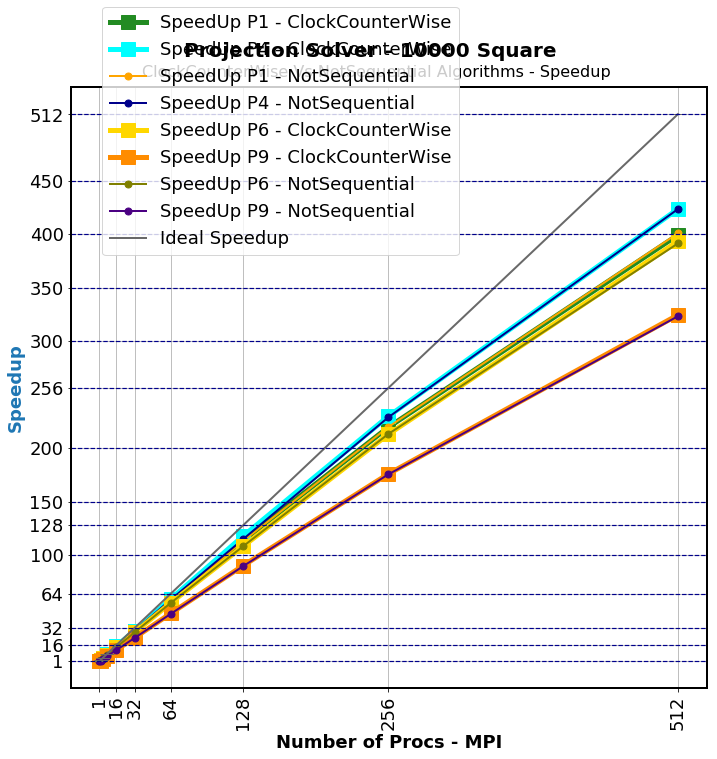

In [72]:
# fig = plt.subplots()
fig = plt.figure(figsize=(10,10))
color='tab:blue'
#   Plotar os valores dos graficos para P1 e P4.
plt.plot(df['Num. Nodes'], df['SpeedUp P1 - ClockCounterWise'], marker='s', markersize=14, color='forestgreen', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P4 - ClockCounterWise'], marker='s', markersize=14, color='cyan', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P1 - NotSequential'], marker='.', markersize=14, color='orange', linewidth=2)
plt.plot(df['Num. Nodes'], df['SpeedUp P4 - NotSequential'], marker='.', markersize=14, color='darkblue', linewidth=2)
plt.plot(df['Num. Nodes'], df['Ideal Speedup'], marker='_', markersize=14, color='dimgrey', linewidth=2)
#   Define a escala do grafico
# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 16, 32, 64, 128, 256, 512], [1, 16, 32, 64, 128, 256, 512], rotation=90)
plt.yticks([1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512], [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512])

lines = [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Square'
subtitle = 'ClockCounterWise Vs NotSequential Algorithms - Speedup\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.92)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold')
plt.ylabel('Speedup', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.05, .72), frameon = True)
plt.grid()
plt.show()

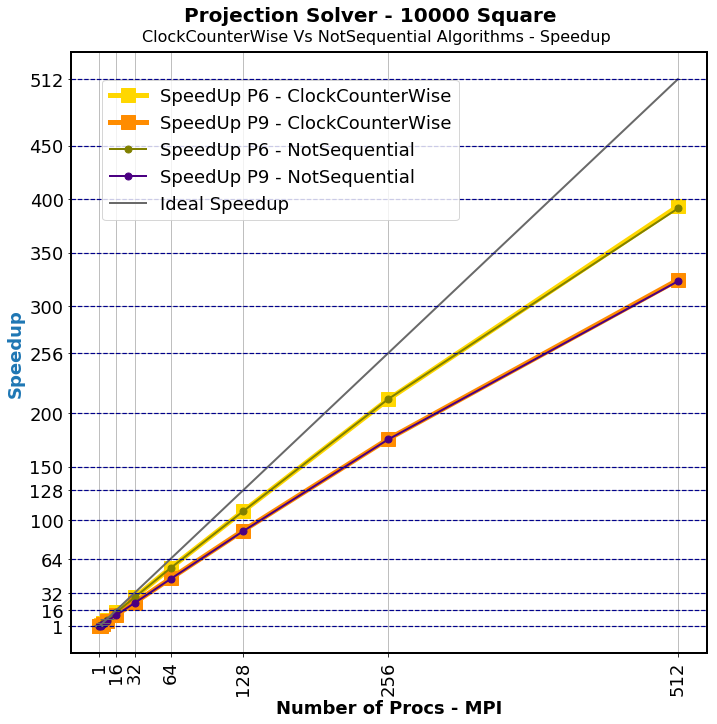

In [71]:
# fig = plt.subplots()
fig2 = plt.figure(figsize=(10,10))
color='tab:blue'
#   Plotar os valores dos graficos para P6 e P9
plt.plot(df['Num. Nodes'], df['SpeedUp P6 - ClockCounterWise'], marker='s', markersize=14, color='gold', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P9 - ClockCounterWise'], marker='s', markersize=14, color='darkorange', linewidth=5)
plt.plot(df['Num. Nodes'], df['SpeedUp P6 - NotSequential'], marker='.', markersize=14, color='olive', linewidth=2)
plt.plot(df['Num. Nodes'], df['SpeedUp P9 - NotSequential'], marker='.', markersize=14, color='indigo', linewidth=2)
plt.plot(df['Num. Nodes'], df['Ideal Speedup'], marker='_', markersize=14, color='dimgrey', linewidth=2)
#   Define a escala do grafico
# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 16, 32, 64, 128, 256, 512], [1, 16, 32, 64, 128, 256, 512], rotation=90)
plt.yticks([1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512], [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512])

lines = [1, 16, 32, 64, 100, 128, 150, 200, 256, 300, 350, 400, 450, 512]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 


#   Plota os labels
plt.tight_layout()
title = 'Projection Solver - 10000 Square'
subtitle = 'ClockCounterWise Vs NotSequential Algorithms - Speedup\n'
plt.suptitle(title, y=0.97, fontsize=20, fontweight='bold', ha='center', va='center')
plt.title(subtitle, x=0.48, fontsize=16, ha='center', va='center')
plt.subplots_adjust(top=0.92)
color='tab:blue'
plt.xlabel('Number of Procs - MPI', fontweight='bold')
plt.ylabel('Speedup', fontweight='bold', color=color)
#   Plota a legenda e o tamanho da figura
plt.legend(loc=(0.05, .72), frameon = True)
plt.grid()
plt.show()